In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


Посмотрим на данные:

In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Надо соединить две таблицы в одну

In [8]:
df = pd.merge(data, regions, on='NOC', how='left')

In [10]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Создадим датафрейм с данными только по золотым медалям

In [13]:
gold_medals = df[(df.Medal == 'Gold')]

gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [14]:
gold_medals.isnull().sum()

ID            0
Name          0
Sex           0
Age         148
Height     2833
Weight     3118
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13201
dtype: int64

Возьмем те данные, в которыз не промущен возраст

In [15]:
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]

И построим график

Можно посмотреть сколько точно таких людей

In [18]:
gold_medals['ID'][gold_medals['Age'] > 50].count()

65

Посмотрим в каких видах спорта, люди, которым больше 50, завоевали золотые медали

In [20]:
gold_medals_sport = gold_medals['Sport'][gold_medals['Age'] > 50]
gold_medals_sport

5078         Equestrianism
7961               Sailing
13394        Equestrianism
13396        Equestrianism
24897        Equestrianism
                ...       
261102             Archery
261671            Shooting
261675    Art Competitions
262865             Archery
266293    Art Competitions
Name: Sport, Length: 65, dtype: object

Нагляднее будет видно на графике

Text(0.5, 1.0, 'Золотые медали спортсменов за 50')

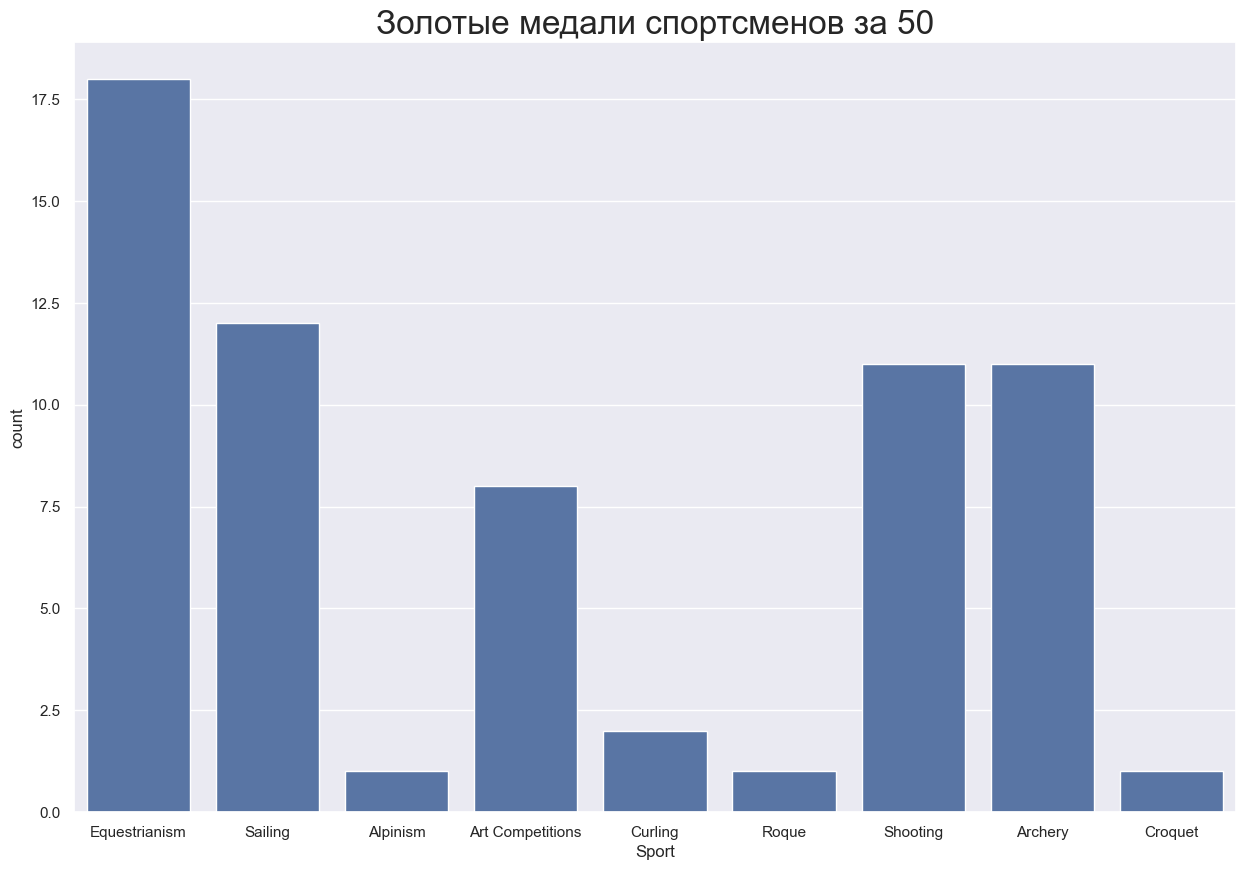

In [42]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(x=gold_medals_sport)
plt.title('Золотые медали спортсменов за 50', fontsize=24)

Теперь отфильтруем наш датасет

In [29]:
womenInGames = data[(data.Sex == 'F') & (data.Season == 'Winter')]

In [30]:
womenInGames.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


Построим график, на котором отложим год (по оси x) и подсчитаем количество медалей на играх.

Text(0.5, 1.0, 'Медали на олимпиаде, полученные женщинами')

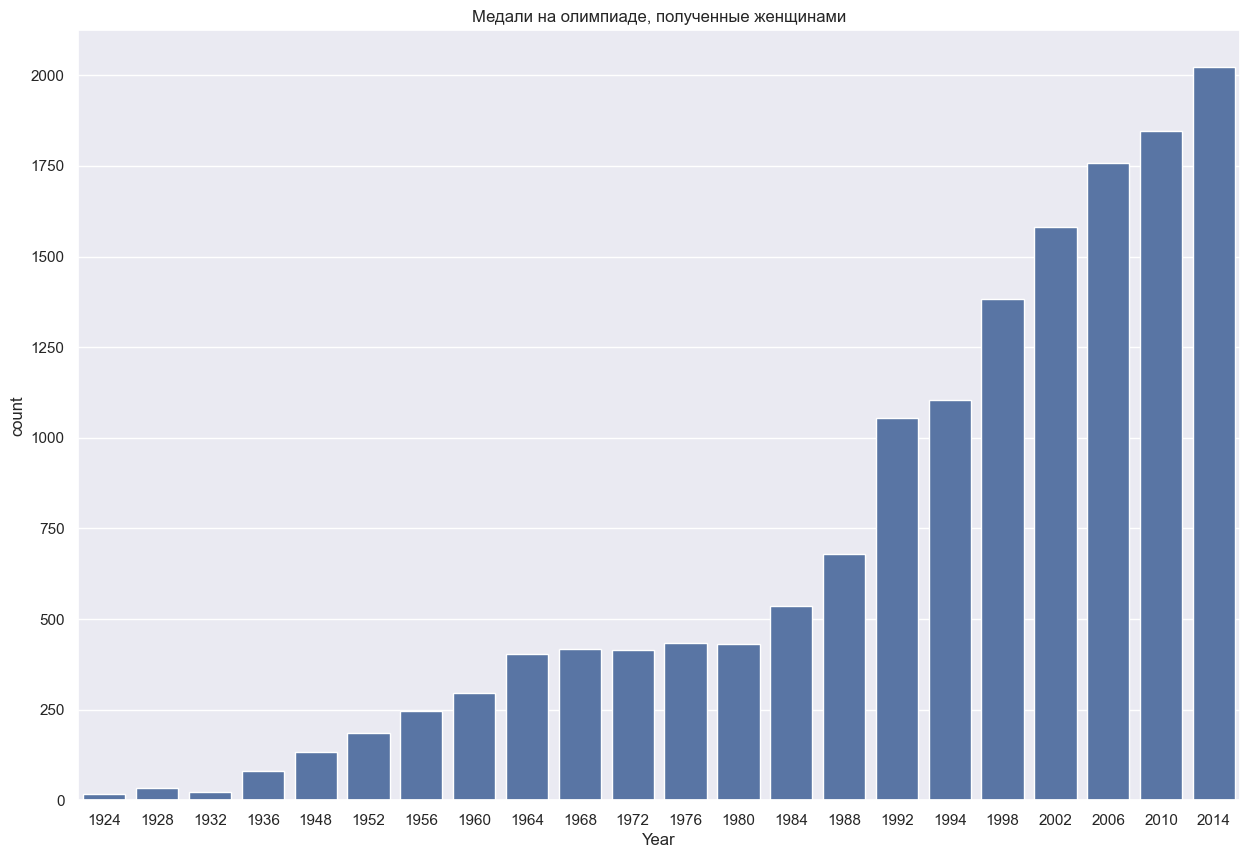

In [43]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=womenInGames)
plt.title('Медали на олимпиаде, полученные женщинами')

Этот график показывает количество спортсменок на зимней олимпиаде, можно посмотреть данные и про летние олимпийские игры.

Text(0.5, 1.0, 'Медали на олимпиаде, полученные женщинами на летних играх')

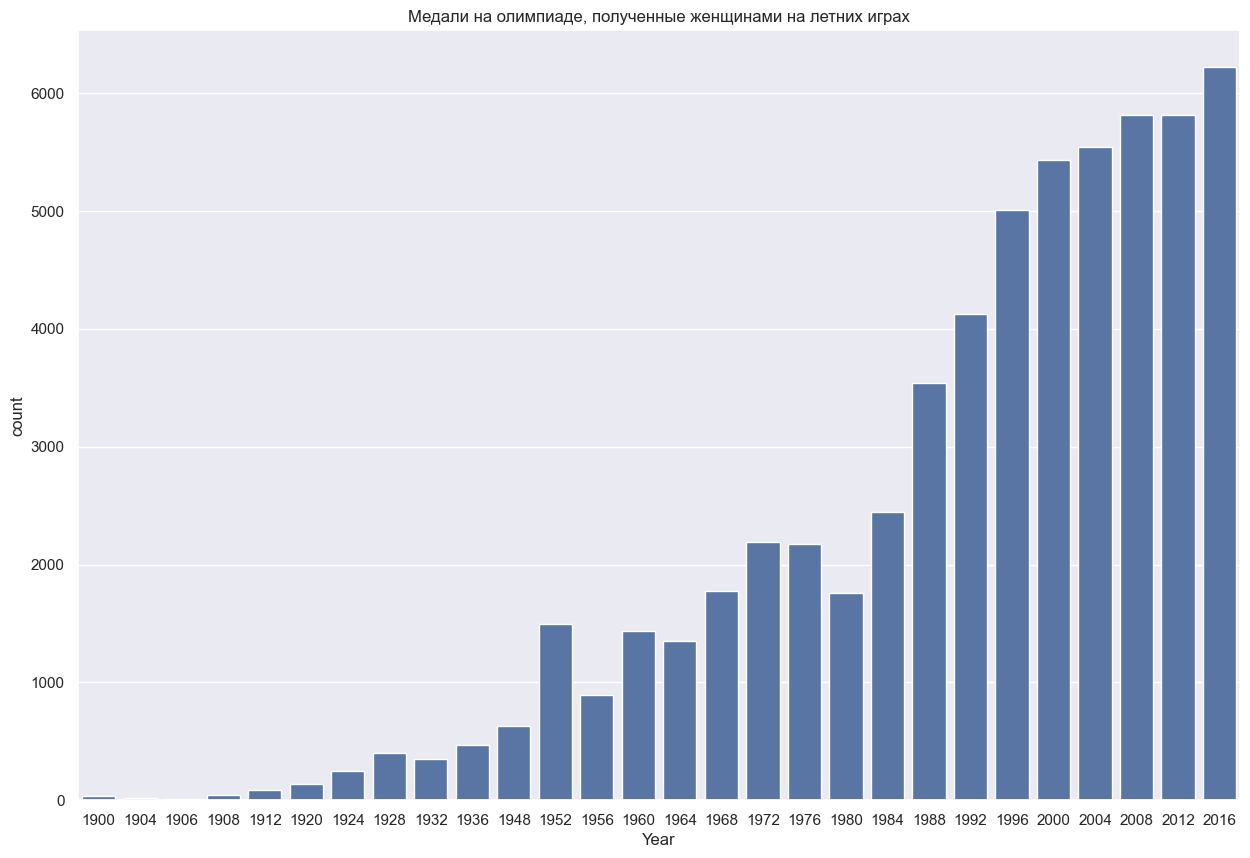

In [44]:
womenInSummerGames = data[(data.Sex == 'F') & (data.Season == 'Summer')]

sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=womenInSummerGames)
plt.title('Медали на олимпиаде, полученные женщинами на летних играх')

По графикам видно, что зимние олимпийский игры начали проходить только в 1924 году, а также на летних играх женщин больше, по сравнению с зимними

Теперь посмотрим на топ 5 стран по золотым медалям

In [37]:
gold_medals.region.value_counts().reset_index(name='Medals').head(5)

,region,Medals
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Чтобы было нагляднее, отобразим данные на графике

C:\Users\ulian\AppData\Local\Temp\ipykernel_9776\2648910838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pic = sns.catplot(x='region', y='Medals', data=top5Region, height=6, kind="bar", palette="muted")


Text(0.5, 1.0, 'Медали по странам')

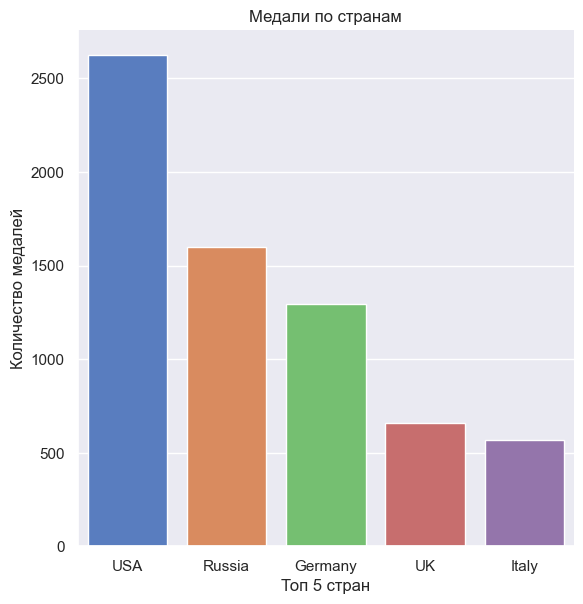

In [ ]:
top5Region = gold_medals.region.value_counts().reset_index(name='Medals').head(5)
pic = sns.catplot(x='region', y='Medals', data=top5Region, height=6, kind="bar", palette="muted")
pic.set_xlabels('Топ 5 стран')
pic.set_ylabels('Количество медалей')
plt.title('Медали по странам')

По графику видно, что лидером является США

Создадим датафрейм, в которм будет только Россия и её золотые медали

In [40]:
goldMedalsInRussia = gold_medals.loc[gold_medals['NOC'] == 'RUS']

Посмотрим золотые медали по разным дисциплинам 

In [41]:
goldMedalsInRussia.Event.value_counts().reset_index(name='Medal').head(10)

,Event,Medal
0,Synchronized Swimming Women's Team,44
1,Rhythmic Gymnastics Women's Group,29
2,Handball Men's Handball,15
3,Handball Women's Handball,15
4,Cross Country Skiing Women's 4 x 5 kilometres ...,12
5,Volleyball Men's Volleyball,12
6,Synchronized Swimming Women's Duet,10
7,Figure Skating Mixed Team,10
8,Figure Skating Mixed Pairs,10
9,Biathlon Women's 4 x 6 kilometres Relay,8


Можно попробовать построить диаграмму рассеяния зависимости роста от веса, чтобы увидеть распределение значений (без группировки по дисциплинам)

In [45]:
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


В данных есть пустые значения в колонках "рост" и "вес". В данном случае заменять NaN средними значениями плохая идея. Поэтому здесь можно просто поработать с теми данныими, которые имеют привычные для нас значения.

In [ ]:
gold_medals.info() # 13224 строчки

<class 'pandas.core.frame.DataFrame'>
Index: 13224 entries, 3 to 271076
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      13224 non-null  int64  
 1   Name    13224 non-null  object 
 2   Sex     13224 non-null  object 
 3   Age     13224 non-null  float64
 4   Height  10532 non-null  float64
 5   Weight  10248 non-null  float64
 6   Team    13224 non-null  object 
 7   NOC     13224 non-null  object 
 8   Games   13224 non-null  object 
 9   Year    13224 non-null  int64  
 10  Season  13224 non-null  object 
 11  City    13224 non-null  object 
 12  Sport   13224 non-null  object 
 13  Event   13224 non-null  object 
 14  Medal   13224 non-null  object 
 15  region  13223 non-null  object 
 16  notes   171 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


In [48]:
notNullMedals = gold_medals[(gold_medals['Height'].notnull() & gold_medals['Weight'].notnull())]

In [49]:
notNullMedals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [ ]:
notNullMedals.info() # 10167 строк

<class 'pandas.core.frame.DataFrame'>
Index: 10167 entries, 42 to 271076
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10167 non-null  int64  
 1   Name    10167 non-null  object 
 2   Sex     10167 non-null  object 
 3   Age     10167 non-null  float64
 4   Height  10167 non-null  float64
 5   Weight  10167 non-null  float64
 6   Team    10167 non-null  object 
 7   NOC     10167 non-null  object 
 8   Games   10167 non-null  object 
 9   Year    10167 non-null  int64  
 10  Season  10167 non-null  object 
 11  City    10167 non-null  object 
 12  Sport   10167 non-null  object 
 13  Event   10167 non-null  object 
 14  Medal   10167 non-null  object 
 15  region  10166 non-null  object 
 16  notes   143 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 1.4+ MB


Теперь посмотрим на распределение

Text(0.5, 1.0, 'Диаграмма рассеивания')

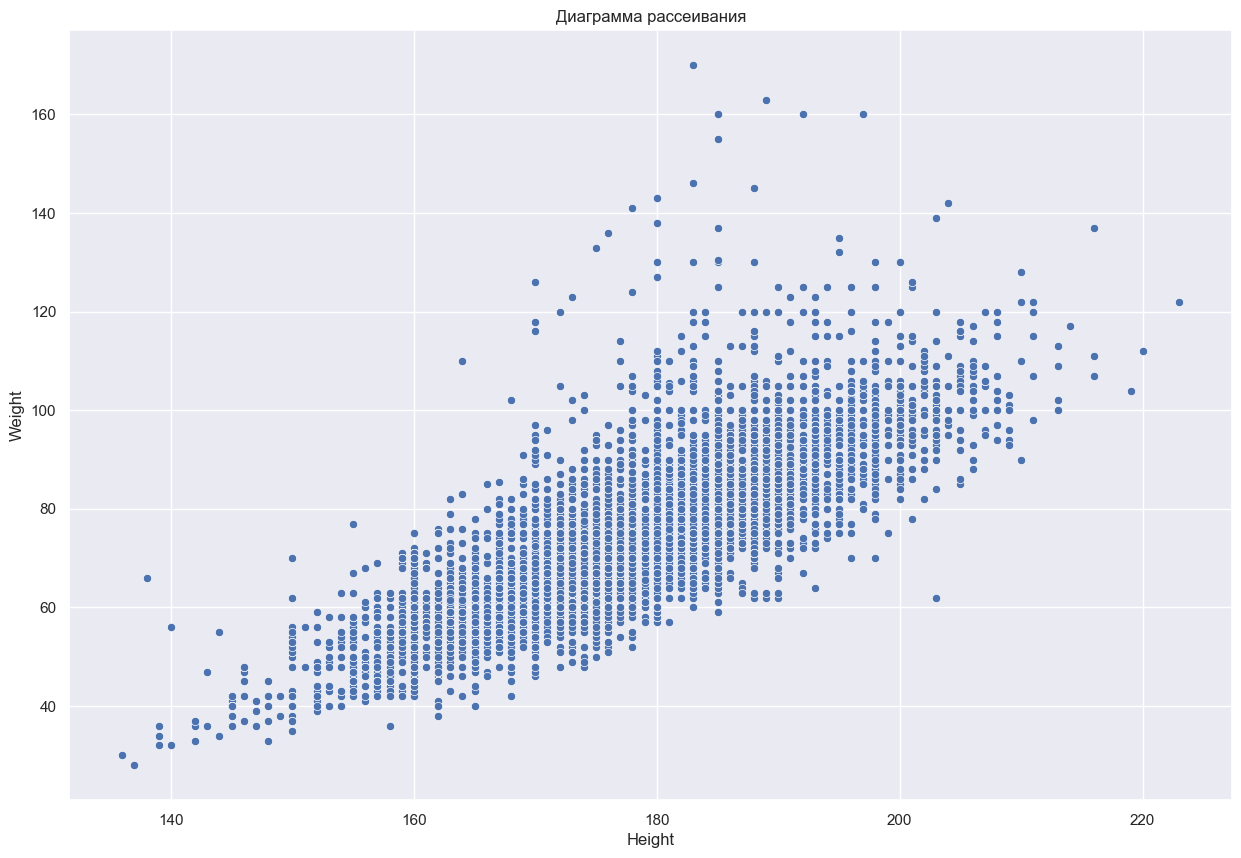

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Height', y='Weight', data=notNullMedals)
plt.title('Диаграмма рассеяния')

Вилим, что чем больше рост, тем больше вес спортсмена

Посмотрим на данные, которых не так много, это спортсмены с весом более 160

In [53]:
notNullMedals.loc[notNullMedals.Weight > 160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


Изменение состава спортсменов мужского и женского пола с течением времени (зимние игры)

In [54]:
menOverTime = data[(data['Sex'] == 'M') & (data['Season'] == 'Winter')]
womenOverTime = data[(data['Sex'] == 'F') & (data['Season'] == 'Winter')]

In [55]:
menOverTime.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


In [56]:
womenOverTime.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


На основе этих данных построим графики

<Axes: title={'center': 'Изменение состава спортсменов-мужчин с течением времени'}, xlabel='Year'>

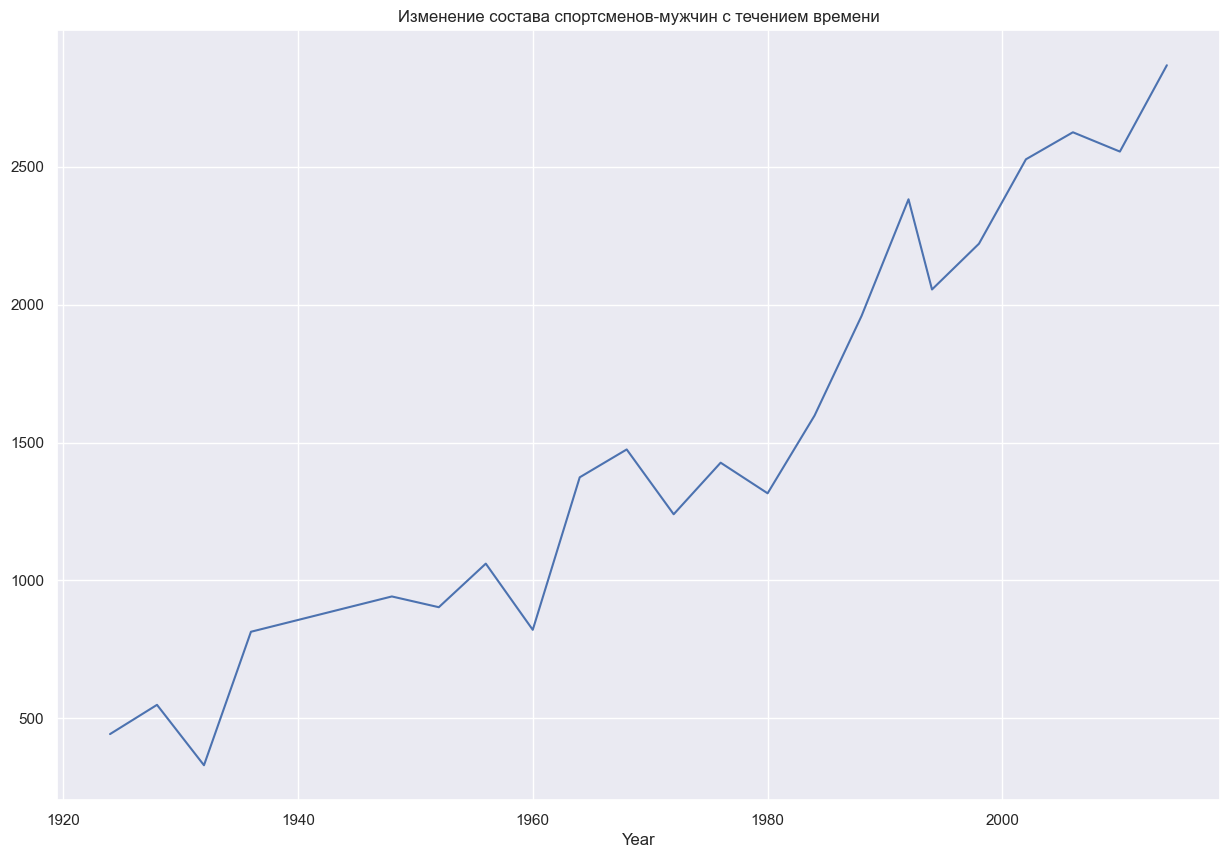

In [57]:
men = menOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(15, 10))
plt.title('Изменение состава спортсменов-мужчин с течением времени')
men.loc[:,'M'].plot()

<Axes: title={'center': 'Изменение состава спортсменок с течением времени'}, xlabel='Year'>

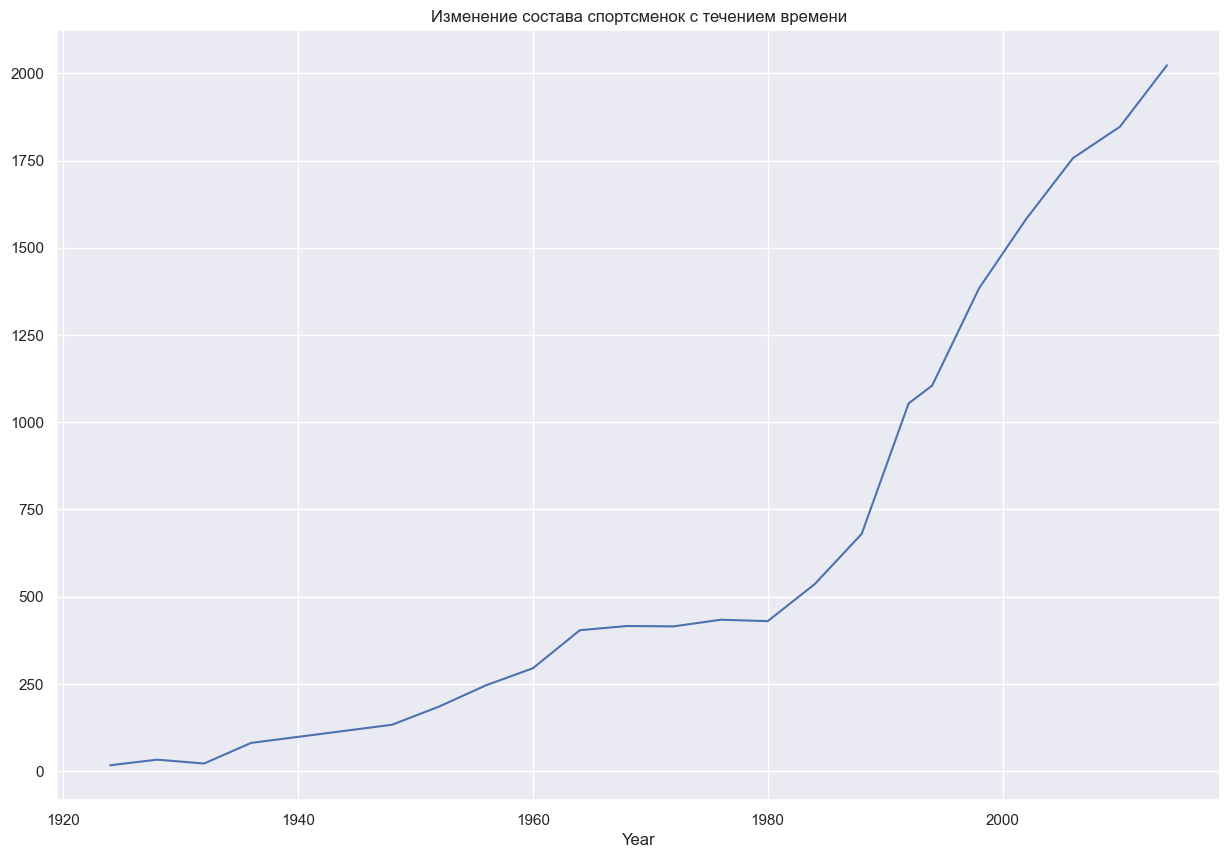

In [58]:
women = womenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(15, 10))
plt.title('Изменение состава спортсменок с течением времени')
women.loc[:, 'F'].plot()

По графикам видно, что количество мужчин и женщин с каждым годом растет. Рост числа женщин намного плавнее, нежели у мужчин

Изменение возраста с течением времени:

<Axes: title={'center': 'Изменение возраста спортсменов-мужчин с течением времени'}, xlabel='Year', ylabel='Age'>

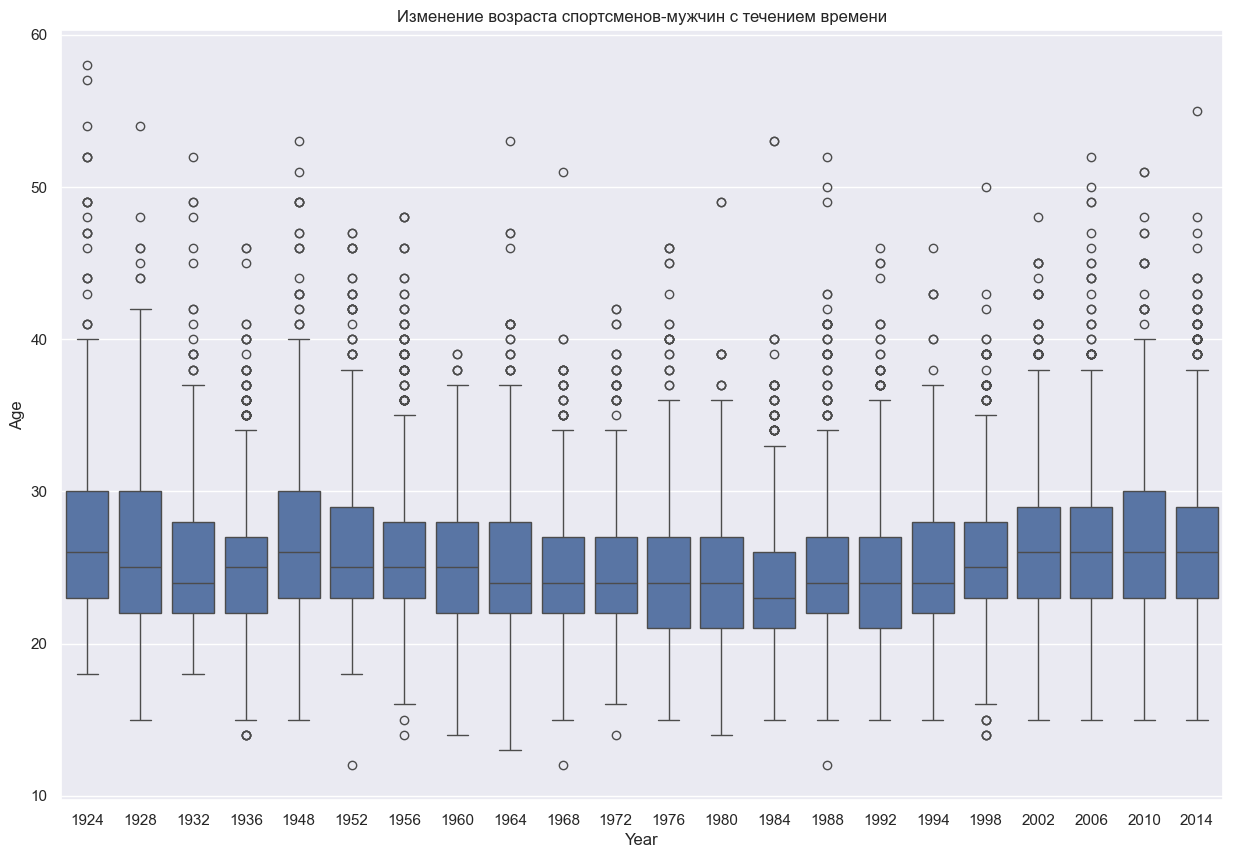

In [60]:
plt.figure(figsize=(15, 10))
plt.title('Изменение возраста спортсменов-мужчин с течением времени')
sns.boxplot(x='Year', y='Age', data=menOverTime)

<Axes: title={'center': 'Изменение возраста спортсменок-женщин с течением времени'}, xlabel='Year', ylabel='Age'>

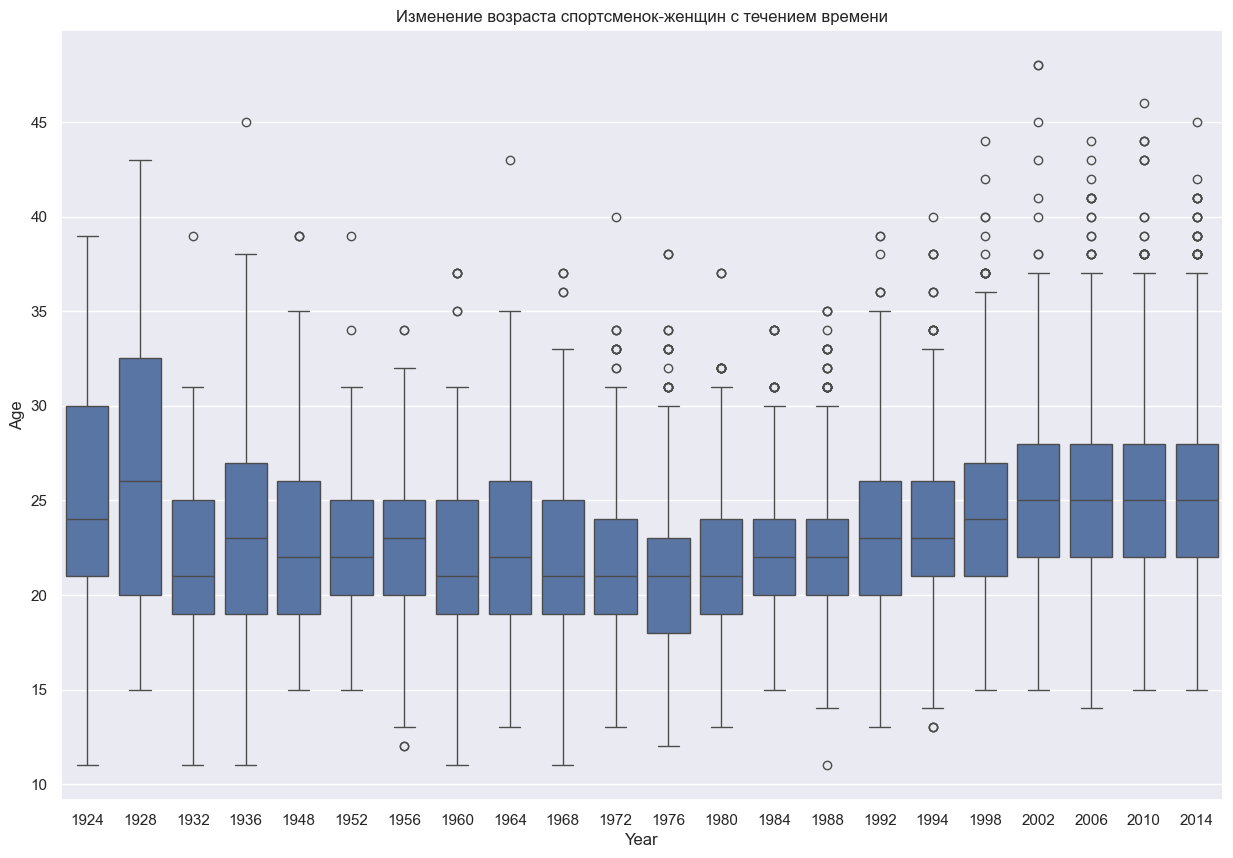

In [61]:
plt.figure(figsize=(15, 10))
plt.title('Изменение возраста спортсменок-женщин с течением времени')
sns.boxplot(x='Year', y='Age', data=womenOverTime)

По данным о мужском поле, можно сказать, что возраст мужчин практически не менялся, +- он оставался в одинаковом промежутке. А вот у женщин наблюдаются сильнве различия, в особенности в 1928 год, этот год вообще выбивается из всех данных. С 2002 по 2014 средний возраст у женщин стабильно был 25 лет.

Изменение веса с течением времени:

<Axes: title={'center': 'Изменение веса спортсменов-мужчин с течением времени'}, xlabel='Year', ylabel='Weight'>

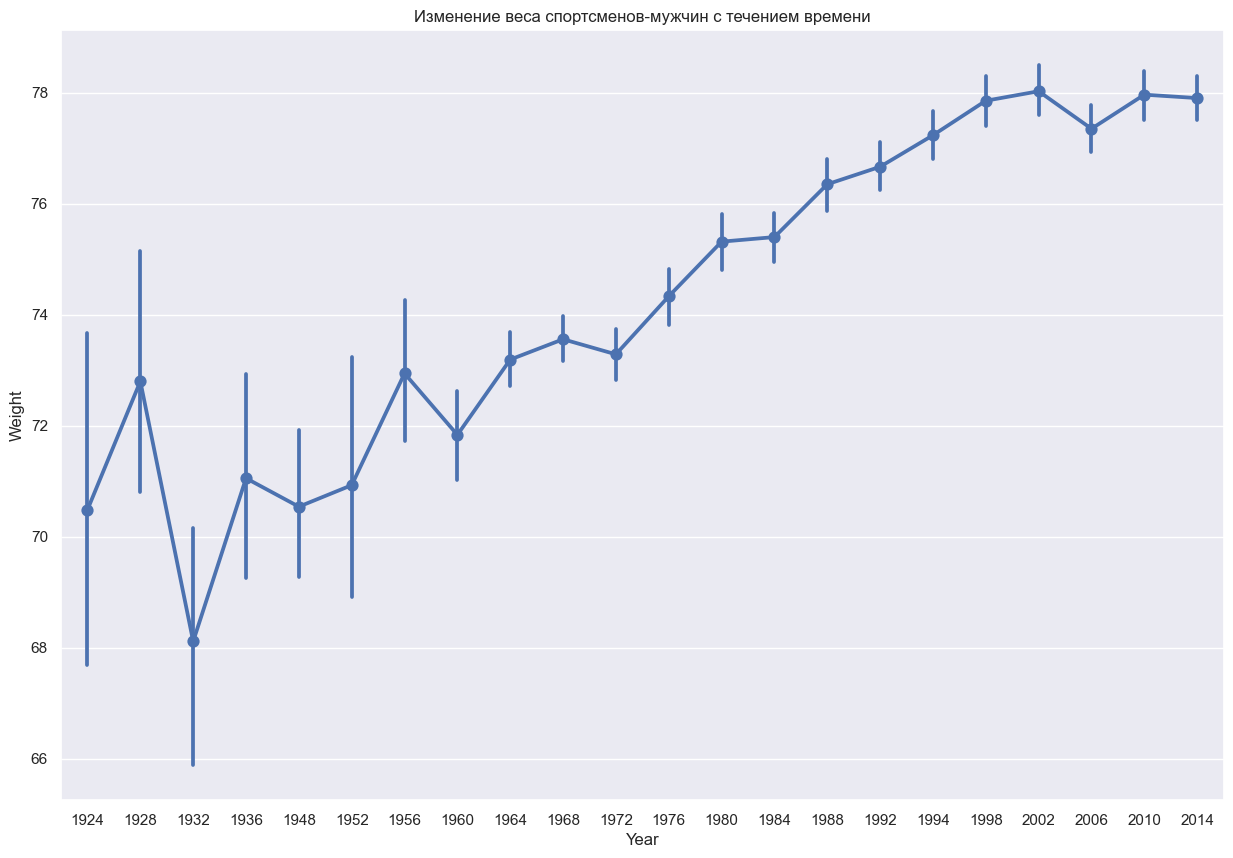

In [64]:
plt.figure(figsize=(15, 10))
plt.title('Изменение веса спортсменов-мужчин с течением времени')
sns.pointplot(x='Year', y='Weight', data=menOverTime)

<Axes: title={'center': 'Изменение веса спортсменок-женщин с течением времени'}, xlabel='Year', ylabel='Weight'>

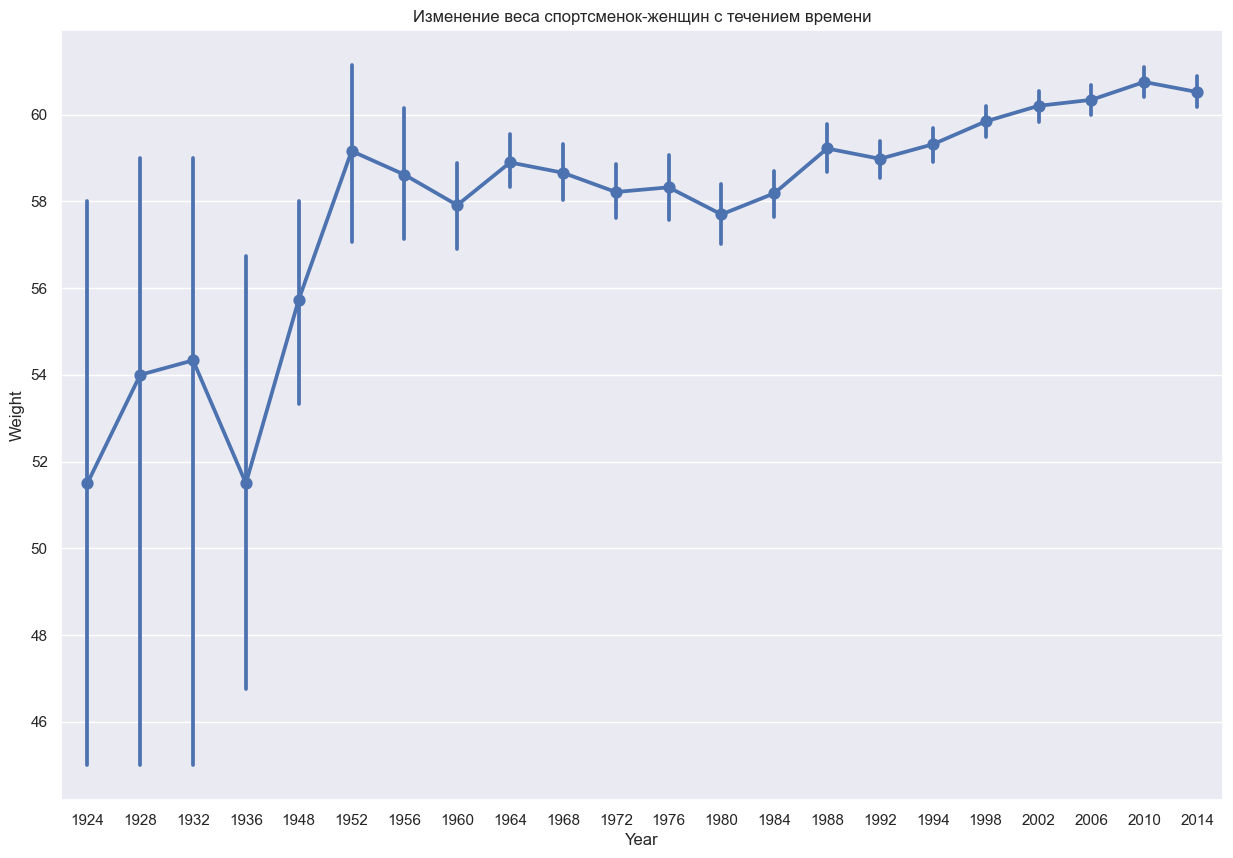

In [66]:
plt.figure(figsize=(15, 10))
plt.title('Изменение веса спортсменок-женщин с течением времени')
sns.pointplot(x='Year', y='Weight', data=womenOverTime)

Количество российских спортсменок

In [70]:
womenOverTime.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [71]:
rusWomenOverTime = womenOverTime.loc[womenOverTime['NOC'] == 'RUS']

C:\Users\ulian\AppData\Local\Temp\ipykernel_9776\4236230333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=rusWomenOverTime, palette='Set2')


Text(0.5, 1.0, 'Изменение возраста российских спортсменок с течением времени')

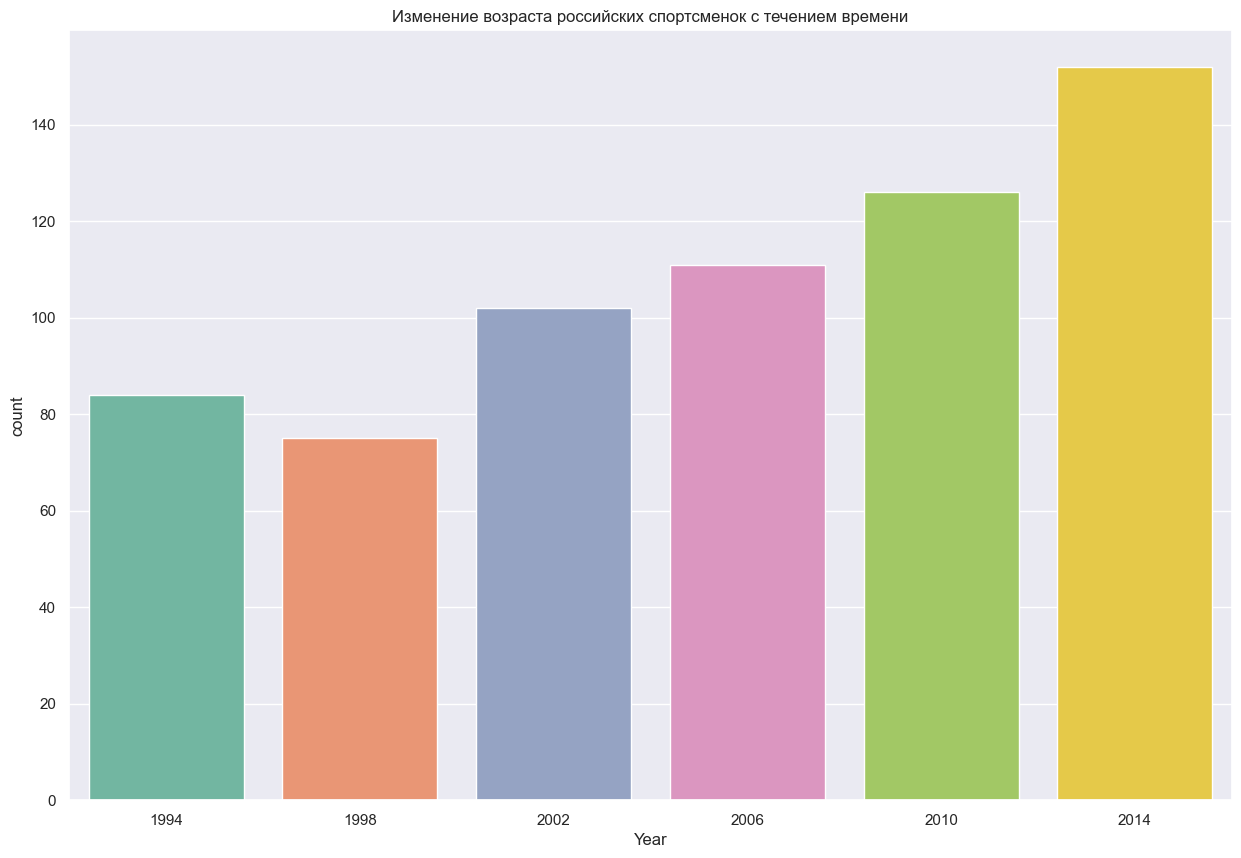

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=rusWomenOverTime, palette='Set2')
plt.title('Изменение количества российских спортсменок с течением времени')

C:\Users\ulian\AppData\Local\Temp\ipykernel_9776\3487266110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=rusMenOverTime, palette='Set2')


Text(0.5, 1.0, 'Изменение количества российских спортсменов с течением времени')

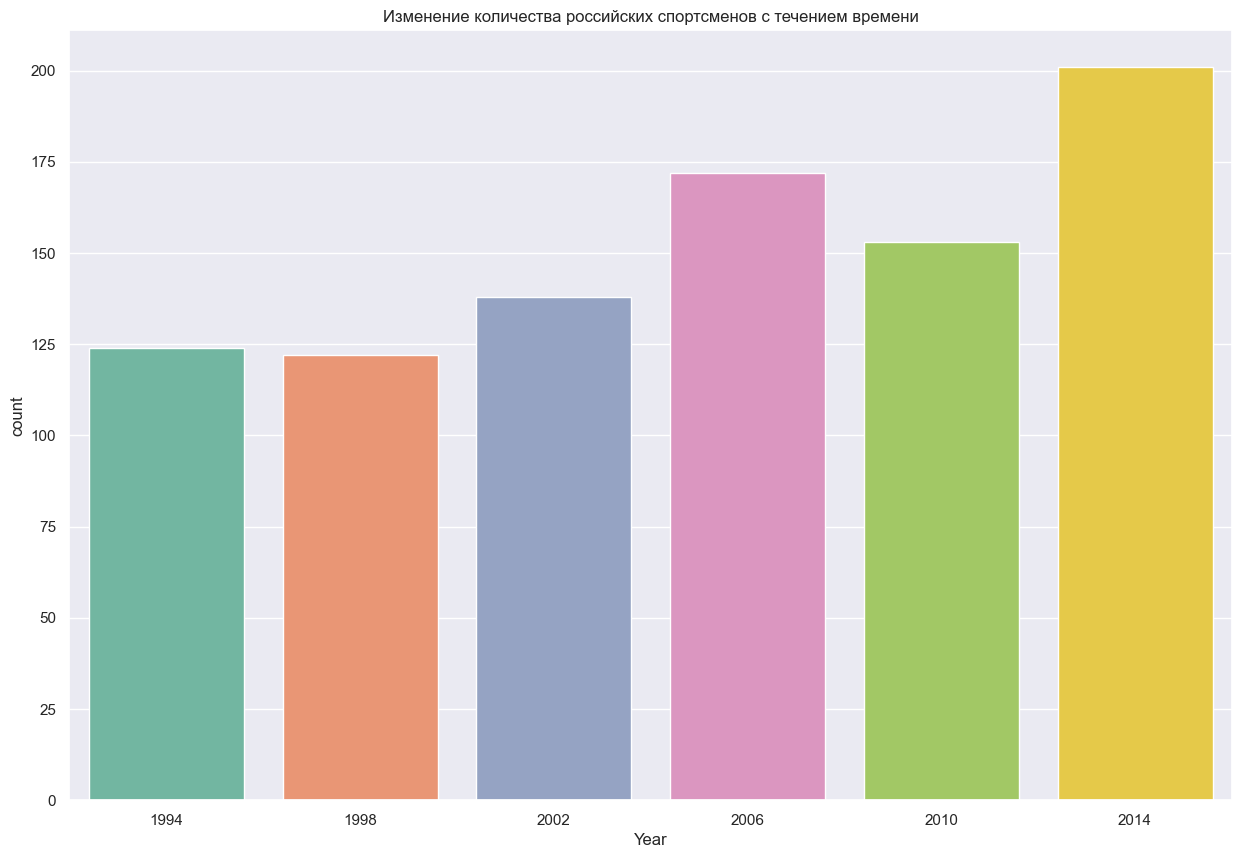

In [95]:
rusMenOverTime = menOverTime.loc[menOverTime['NOC'] == 'RUS']
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=rusMenOverTime, palette='Set2')
plt.title('Изменение количества российских спортсменов с течением времени')

Видно, что количество российских спортсменов увеличивалось с каждым годом

Рассмотрим отдельные виды спорта, а именно гимнастику 

In [112]:
hockMenOverTime = menOverTime.loc[menOverTime.Sport == 'Ice Hockey']
hockWomenOverTime = womenOverTime.loc[womenOverTime.Sport == 'Ice Hockey']

hockMenCount = hockMenOverTime.groupby('Year').size().reset_index(name='Count')
hockWomenCount = hockWomenOverTime.groupby('Year').size().reset_index(name='Count')


hockMenCount['Gender'] = 'Men'
hockWomenCount['Gender'] = 'Women'

combined_data = pd.concat([hockMenCount, hockWomenCount])

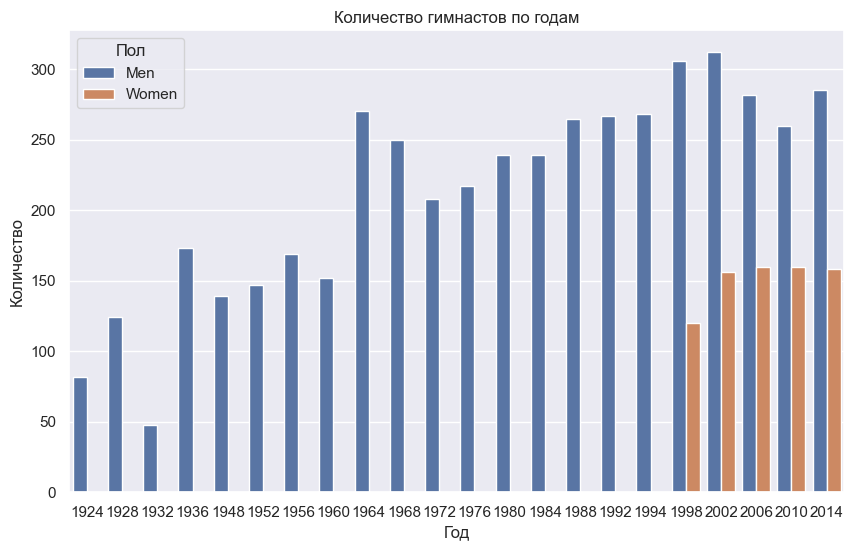

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data, x='Year', y='Count', hue='Gender')
plt.title('Количество гимнастов по годам')
plt.ylabel('Количество')
plt.xlabel('Год')
plt.legend(title='Пол')

По графику видно, что женщины начали играть в хоккей на олимпийских играх только в 1998 и количество женского пола значительно меньше мужского.